<a href="https://colab.research.google.com/github/AaryanAnand10/Drug-Performance-Evaluation/blob/main/Drugs_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Drug.csv')

In [3]:
df.head(5)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [4]:
df.isna().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

In [5]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


In [6]:
df['Drug'].value_counts()

Acetaminophen                                             114
Ibuprofen                                                  73
Diphenhydramine Hcl                                        58
Aspirin                                                    42
Sulfamethoxazole-Trimethoprim                              40
                                                         ... 
Pramoxine-Zinc Oxide                                        1
Hydrocortisone Acetate, Bismuth Subg-Balsam-Znox-Resor      1
Fluocinolone-Skin Clnsr28                                   1
Starch, Pramoxine-Mineral Oil-Zinc                          1
Zinc Oxide                                                  1
Name: Drug, Length: 470, dtype: int64

In [7]:
df['Condition'].value_counts()

fever                                        308
hypertension                                 236
Atopic Dermatitis                            209
endometriosis                                163
gastroesophageal reflux disease              131
Bacterial Urinary Tract Infection            131
back pain                                    123
gout                                         110
Pharyngitis due to Streptococcus Pyogenes     83
vertigo                                       81
flatulence                                    76
Acute Bacterial Sinusitis                     65
hypercholesterolemia                          59
hemorrhoids                                   53
diverticulitis of gastrointestinal tract      48
Bacterial Conjunctivitis                      42
edema                                         41
prevention of cerebrovascular accident        38
depression                                    32
vulvovaginal candidiasis                      29
fibromyalgia        

In [8]:
df['Indication'].value_counts()

On Label     1723
Off Label     465
\r\n           31
Name: Indication, dtype: int64

In [9]:
df['Indication'] = df['Indication'].str.replace('\r\n', 'Unknown')

df['Indication'].value_counts()

On Label     1723
Off Label     465
Unknown        31
Name: Indication, dtype: int64

In [10]:
df['Type'].value_counts()

RX        1401
OTC        737
RX/OTC      74
\r\n         7
Name: Type, dtype: int64

In [11]:
df['Type'] = df['Type'].str.replace('\r\n', 'Unknown')

df['Type'].value_counts()

RX         1401
OTC         737
RX/OTC       74
Unknown       7
Name: Type, dtype: int64

In [12]:
df['Reviews'] = df['Reviews'].str.replace('Reviews', '')
df['Reviews'] = df['Reviews'].astype('float64')

In [13]:
df.dtypes

Condition        object
Drug             object
Indication       object
Type             object
Reviews         float64
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object

In [14]:
def categorize_effectiveness(effective):
    if effective < 1.0 : return 'Very Uneffective'
    elif effective < 2.0 : return 'Uneffective'
    elif effective < 3.0 : return 'Partly Effective'
    elif effective < 4.0 : return 'More Than Effective'
    elif effective <= 5.0 : return 'Very Effective'

In [15]:
df['Effective_Cat'] = df['Effective'].apply(categorize_effectiveness)

In [16]:
df['Effective_Cat'].value_counts()

Very Effective         939
More Than Effective    817
Partly Effective       280
Uneffective            183
Name: Effective_Cat, dtype: int64

In [17]:
df[['Effective_Cat', 'Type']].groupby(['Effective_Cat','Type'])['Type'].count()

Effective_Cat        Type   
More Than Effective  OTC        136
                     RX         638
                     RX/OTC      39
                     Unknown      4
Partly Effective     OTC         73
                     RX         195
                     RX/OTC      11
                     Unknown      1
Uneffective          OTC         89
                     RX          92
                     RX/OTC       2
Very Effective       OTC        439
                     RX         476
                     RX/OTC      22
                     Unknown      2
Name: Type, dtype: int64

In [18]:
df[['Effective_Cat', 'Indication']].groupby(['Effective_Cat','Indication'])['Effective_Cat'].count()

Effective_Cat        Indication
More Than Effective  Off Label     167
                     On Label      642
                     Unknown         8
Partly Effective     Off Label      41
                     On Label      235
                     Unknown         4
Uneffective          Off Label      33
                     On Label      149
                     Unknown         1
Very Effective       Off Label     224
                     On Label      697
                     Unknown        18
Name: Effective_Cat, dtype: int64

In [19]:
def categorize_ease_of_use(easeOfUse):
    if easeOfUse < 1.0 : return 'Very Difficult'
    elif easeOfUse < 2.0 : return 'Difficult'
    elif easeOfUse < 3.0 : return 'Normal'
    elif easeOfUse < 4.0 : return 'Easy'
    elif easeOfUse <= 5.0 : return 'Very Easy'

In [20]:
df['EaseOfUse_Cat'] = df['EaseOfUse'].apply(categorize_ease_of_use)

In [21]:
df['EaseOfUse_Cat'].value_counts()

Very Easy    1434
Easy          531
Normal        127
Difficult     127
Name: EaseOfUse_Cat, dtype: int64

In [22]:
df[['EaseOfUse_Cat', 'Type']].groupby(['EaseOfUse_Cat','Type'])['Type'].count()

EaseOfUse_Cat  Type   
Difficult      OTC         58
               RX          67
               RX/OTC       2
Easy           OTC         81
               RX         429
               RX/OTC      19
               Unknown      2
Normal         OTC         30
               RX          97
Very Easy      OTC        568
               RX         808
               RX/OTC      53
               Unknown      5
Name: Type, dtype: int64

In [23]:
def categorize_satisfaction(satisfaction):
    if satisfaction < 1.0 : return 'Very Unsatisfied'
    elif satisfaction < 2.0 : return 'Unsatisfied'
    elif satisfaction < 3.0 : return 'Partly Satisfied'
    elif satisfaction < 4.0 : return 'More Than Satisfied'
    elif satisfaction <= 5.0 : return 'Very Satisfied'

In [24]:
df['Satisfaction_Cat'] = df['Satisfaction'].apply(categorize_satisfaction)

In [26]:
df['Satisfaction_Cat'].value_counts()

Very Satisfied         744
More Than Satisfied    623
Partly Satisfied       533
Unsatisfied            319
Name: Satisfaction_Cat, dtype: int64

In [27]:
df[['Satisfaction_Cat', 'Type']].groupby(['Satisfaction_Cat','Type'])['Type'].count()

Satisfaction_Cat     Type   
More Than Satisfied  OTC        115
                     RX         468
                     RX/OTC      36
                     Unknown      4
Partly Satisfied     OTC         74
                     RX         439
                     RX/OTC      19
                     Unknown      1
Unsatisfied          OTC        124
                     RX         193
                     RX/OTC       2
Very Satisfied       OTC        424
                     RX         301
                     RX/OTC      17
                     Unknown      2
Name: Type, dtype: int64

<ipython-input-28-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

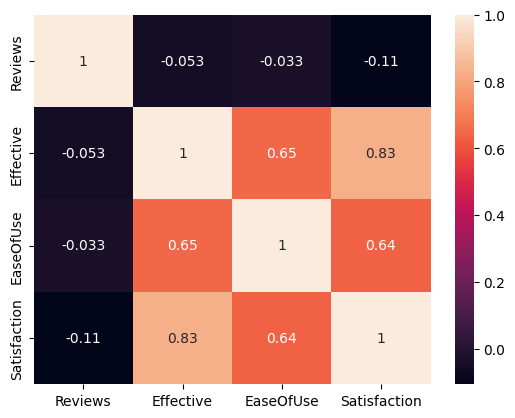

In [28]:
sns.heatmap(df.corr(), annot=True)

In [29]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,Effective_Cat,EaseOfUse_Cat,Satisfaction_Cat
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Partly Effective,Easy,Unsatisfied
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...,Partly Effective,Easy,Partly Satisfied
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...,More Than Effective,Very Easy,Partly Satisfied
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...,More Than Effective,Easy,Partly Satisfied
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...,Partly Effective,Normal,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
1748,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2.0,5.00,5.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...,Very Effective,Very Easy,Very Satisfied
1749,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1.0,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...,Very Effective,Very Easy,Very Satisfied
1750,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1.0,5.00,4.00,5.00,\r\n\t\t\t\t\tClotrimazole is used to treat sk...,Very Effective,Very Easy,Very Satisfied
1751,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1.0,5.00,5.00,5.00,\r\n\t\t\t\t\tThis medication is used to treat...,Very Effective,Very Easy,Very Satisfied


In [30]:
popular_drugs = df.sort_values(by='Reviews', ascending=False).head(10)

<Axes: xlabel='Effective', ylabel='Drug'>

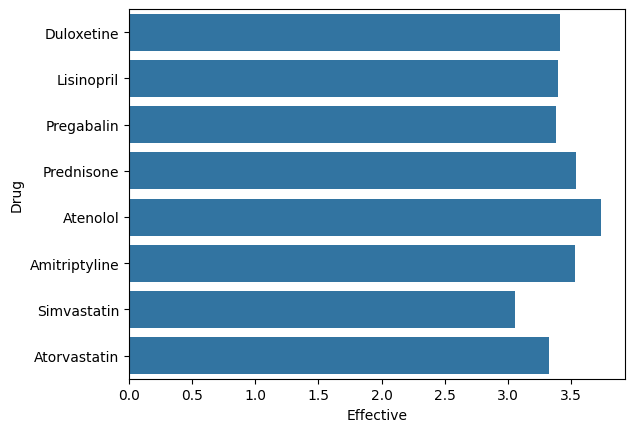

In [31]:
sns.barplot(data=popular_drugs, y='Drug', x='Effective')

<Axes: xlabel='EaseOfUse', ylabel='Drug'>

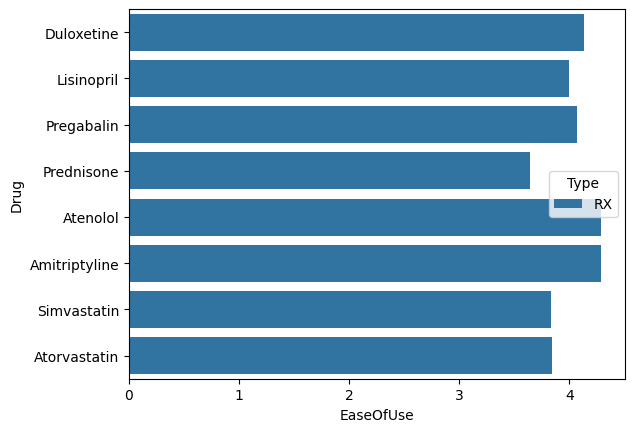

In [32]:
sns.barplot(data=popular_drugs, y='Drug', x='EaseOfUse', hue='Type')

<Axes: xlabel='EaseOfUse', ylabel='Drug'>

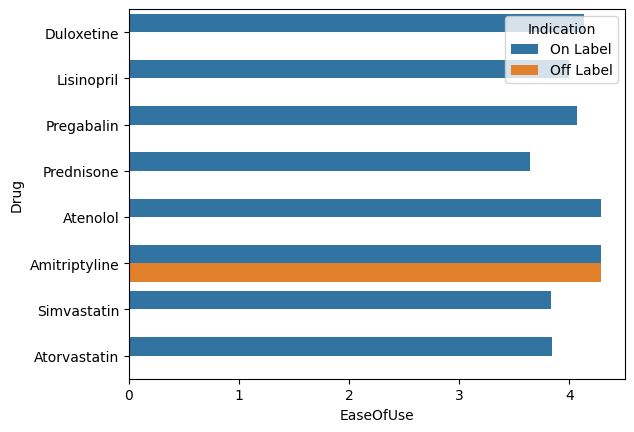

In [33]:
sns.barplot(data=popular_drugs, y='Drug', x='EaseOfUse', hue='Indication')